## **캐글 코리아 4차 대회 01**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
train = pd.read_csv('data/4th_kaggle/train.csv')
test = pd.read_csv('data/4th_kaggle/test.csv')
sub = pd.read_csv('data/4th_kaggle/sample_submission.csv')

In [2]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [3]:
test.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [4]:
sub.columns

Index(['id', 'prediction'], dtype='object')

In [5]:
print("학습용 데이터 : ", train.shape)
print("테스트용 데이터 : ", test.shape)

학습용 데이터 :  (26049, 16)
테스트용 데이터 :  (6512, 15)


In [6]:
train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
test.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6512 non-null   int64 
 1   age             6512 non-null   int64 
 2   workclass       6512 non-null   object
 3   fnlwgt          6512 non-null   int64 
 4   education       6512 non-null   object
 5   education_num   6512 non-null   int64 
 6   marital_status  6512 non-null   object
 7   occupation      6512 non-null   object
 8   relationship    6512 non-null   object
 9   race            6512 non-null   object
 10  sex             6512 non-null   object
 11  capital_gain    6512 non-null   int64 
 12  capital_loss    6512 non-null   int64 
 13  hours_per_week  6512 non-null   int64 
 14  native_country  6512 non-null   object
dtypes: int64(7), object(8)
memory usage: 763.2+ KB


In [10]:
train.income.unique()

array(['>50K', '<=50K'], dtype=object)

<AxesSubplot:xlabel='income', ylabel='count'>

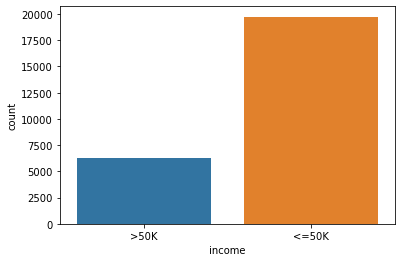

In [11]:
sns.countplot(x="income", data=train)

In [12]:
train.loc[ train['income']=='>50K' , 'target'] = 1
train.loc[ train['income']=='<=50K' , 'target'] = 0
train['target'] = train.target.astype("int")
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [13]:
test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [14]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'target'],
      dtype='object')

In [15]:
sel = ['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

X = train[sel]
y = train['target']

test_X = test[sel]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=train.target,
                                                   random_state=42)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19536, 7) (6513, 7) (19536,) (6513,)


In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(test_X)

In [18]:
sub.columns

Index(['id', 'prediction'], dtype='object')

In [19]:
print( sub.shape )
print( pred.shape )

(6512, 2)
(6512,)


In [20]:
sub['prediction'] = pred
sub.to_csv("firstSub4th.csv", index=False)

## **Score : 0.78545**

## **캐글 코리아 4차 대회 02**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
train = pd.read_csv('data/4th_kaggle/train.csv')
test = pd.read_csv('data/4th_kaggle/test.csv')
sub = pd.read_csv('data/4th_kaggle/sample_submission.csv')

In [22]:
print("학습용 데이터 : ", train.shape)
print("테스트용 데이터 : ", test.shape)

학습용 데이터 :  (26049, 16)
테스트용 데이터 :  (6512, 15)


In [23]:
y = train['income']
test['income'] = "blank"
all_dat = pd.concat([train, test], axis=0)
print(all_dat.shape)

(32561, 16)


In [24]:
all_dat.income.value_counts()

<=50K    19744
blank     6512
>50K      6305
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

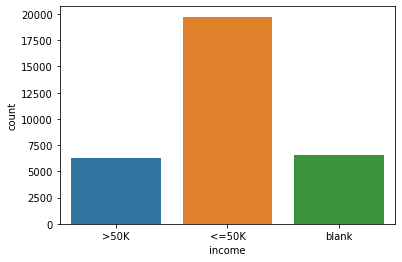

In [25]:
sns.countplot(x="income", data=all_dat)

In [26]:
all_dat.loc[ all_dat['income']=='>50K' , 'target'] = 1
all_dat.loc[ all_dat['income']=='<=50K' , 'target'] = 0
all_dat.loc[ all_dat['income']=='blank' , 'target'] = 999
all_dat['target'] = all_dat.target.astype("int")


all_dat.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [27]:
all_dat.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'target'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder


en_x = LabelEncoder()
all_dat['workclass_lbl'] = en_x.fit_transform(all_dat['workclass'])
all_dat.head(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target,workclass_lbl
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1,4
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0,4
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0,4


In [29]:
all_dat['education_lbl'] = en_x.fit_transform(all_dat['education'])
all_dat['marital_status_lbl'] = en_x.fit_transform(all_dat['marital_status'])
all_dat['occupation_lbl'] = en_x.fit_transform(all_dat['occupation'])
all_dat['relationship_lbl'] = en_x.fit_transform(all_dat['relationship'])
all_dat['race_lbl'] = en_x.fit_transform(all_dat['race'])
all_dat['native_country_lbl'] = en_x.fit_transform(all_dat['native_country'])
all_dat.head(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,United-States,>50K,1,4,11,2,12,0,4,39
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,United-States,<=50K,0,4,6,4,7,3,4,39
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,United-States,<=50K,0,4,15,4,8,3,4,39


In [30]:
all_dat['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
mf_mapping = {"Male": 1, "Female": 2}
all_dat['sex'] = all_dat['sex'].map(mf_mapping)
all_dat.head(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,United-States,>50K,1,4,11,2,12,0,4,39
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,United-States,<=50K,0,4,6,4,7,3,4,39
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,United-States,<=50K,0,4,15,4,8,3,4,39


In [32]:
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 'native_country' ]
all_dat_n = all_dat.drop(sel_cat, axis=1)
all_dat_n

,id,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,40,168538,9,1,0,0,60,>50K,1,4,11,2,12,0,4,39
1,1,17,101626,5,1,0,0,20,<=50K,0,4,6,4,7,3,4,39
2,2,18,353358,10,1,0,0,16,<=50K,0,4,15,4,8,3,4,39
3,3,21,151158,10,2,0,0,25,<=50K,0,4,15,4,10,3,4,39
4,4,24,122234,10,2,0,0,20,<=50K,0,4,15,4,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,61343,13,1,0,0,40,blank,999,4,9,2,12,0,4,39
6508,6508,41,32185,13,1,0,0,40,blank,999,5,9,2,13,0,4,39
6509,6509,39,409189,3,1,0,0,40,blank,999,4,4,2,8,0,4,26
6510,6510,35,180342,9,1,0,0,40,blank,999,4,11,2,3,0,4,39


In [33]:
X_cat = all_dat_n.drop(['target'],axis=1)
y = all_dat_n['target']

train_n = all_dat_n.loc[ (all_dat_n['target']==0) | (all_dat_n['target']==1)  , : ]
test_n = all_dat_n.loc[ all_dat_n['target']==999  ,  : ]

print(train_n.shape, test_n.shape)

(26049, 17) (6512, 17)


In [34]:
train_n.head(3)

,id,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,40,168538,9,1,0,0,60,>50K,1,4,11,2,12,0,4,39
1,1,17,101626,5,1,0,0,20,<=50K,0,4,6,4,7,3,4,39
2,2,18,353358,10,1,0,0,16,<=50K,0,4,15,4,8,3,4,39


In [35]:
test_n.head(3)

,id,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,target,workclass_lbl,education_lbl,marital_status_lbl,occupation_lbl,relationship_lbl,race_lbl,native_country_lbl
0,0,28,67661,10,2,0,0,40,blank,999,4,15,4,1,2,4,39
1,1,40,37869,9,1,0,0,50,blank,999,5,11,2,4,0,4,39
2,2,20,109952,10,1,0,0,25,blank,999,4,15,4,6,3,4,39


In [36]:
sel_cat = ['income']

train_n = train_n.drop(['income'], axis=1)
test_n = test_n.drop(['income', 'target'], axis=1)

print(train_n.shape, test_n.shape)

(26049, 16) (6512, 15)


In [37]:
train_n.columns

Index(['id', 'age', 'fnlwgt', 'education_num', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'target', 'workclass_lbl',
       'education_lbl', 'marital_status_lbl', 'occupation_lbl',
       'relationship_lbl', 'race_lbl', 'native_country_lbl'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split


sel = ['age', 'education_num', 'sex']

X_tr_all = train_n[sel]
y_tr_all = train_n['target']
X_test_all = test_n[sel]

X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.7960403641548756, 0.7901471529110684)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


model_list = [RandomForestClassifier(),AdaBoostClassifier(), GradientBoostingClassifier()]

for model in model_list:
    m = model
    m.fit(X_train, y_train)
    
    ac_tr = model.score(X_train, y_train)
    ac_test = model.score(X_test, y_test)
    
    print(ac_tr, ac_test)

0.8174838214324888 0.7845169545745362
0.8044861248217615 0.7982085732565579
0.8076669957222771 0.7980806142034549


In [41]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test_all)


sub['prediction'] = pred
sub.to_csv("secondSub4th_gb.csv", index=False)

## **Score : 0.80939**

## **캐글 코리아 4차 대회 03**

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
train = pd.read_csv('data/4th_kaggle/train.csv')
test = pd.read_csv('data/4th_kaggle/test.csv')
sub = pd.read_csv('data/4th_kaggle/sample_submission.csv')

In [43]:
print("학습용 데이터 : ", train.shape)
print("테스트용 데이터 : ", test.shape)

학습용 데이터 :  (26049, 16)
테스트용 데이터 :  (6512, 15)


In [44]:
y = train['income']
test['income'] = "blank"

all_dat = pd.concat([train, test], axis=0)
print(all_dat.shape)

(32561, 16)


In [45]:
all_dat.income.value_counts()

<=50K    19744
blank     6512
>50K      6305
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

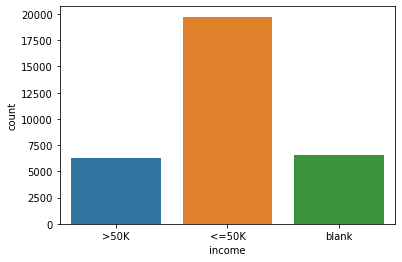

In [46]:
sns.countplot(x="income", data=all_dat)

In [47]:
all_dat.loc[ all_dat['income']=='>50K' , 'target'] = 1
all_dat.loc[ all_dat['income']=='<=50K' , 'target'] = 0
all_dat.loc[ all_dat['income']=='blank' , 'target'] = 999
all_dat['target'] = all_dat.target.astype("int")


all_dat.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [48]:
all_dat.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'target'],
      dtype='object')

In [49]:
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 
           'sex', 'native_country' ]

X_cat = all_dat[sel_cat]
y = all_dat['target']


X_dummy = pd.get_dummies(X_cat)
X_dummy

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6508,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6510,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
all_dat_n = pd.concat([all_dat, X_dummy], axis=1)
all_dat_n

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6508,6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6509,6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,...,0,0,0,0,0,0,0,0,0,0
6510,6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,...,0,0,0,0,0,0,0,1,0,0


In [51]:
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 
           'sex', 'native_country', 'income']

all_dat_n = all_dat_n.drop(sel_cat, axis=1)


train_n = all_dat_n.loc[ (all_dat_n['target']==0) | 
                        (all_dat_n['target']==1)  , : ]
test_n = all_dat_n.loc[ all_dat_n['target']==999  ,  : ]


print(train_n.shape, test_n.shape)

(26049, 110) (6512, 110)


In [52]:
X = train_n.drop(['target'], axis=1)
y = train_n['target']

test_X = test_n.drop(['target'], axis=1)


print(X.shape, y.shape, test_X.shape)

(26049, 109) (26049,) (6512, 109)


In [53]:
X.columns

Index(['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=109)

In [54]:
type(X)

pandas.core.frame.DataFrame

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


sel = ['age', 'fnlwgt', 'capital_gain']

X_tr_all = X[sel]
y_tr_all = y
X_test_all = test_X[sel]

X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [59]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import time

In [61]:
model_list = ["RandomForestRegressor",  "xgb_basic", "lightgbm-model", 
              "GradientBoostingClassifier", "LogisticRegression"]
model_score = []
model_time = []

In [62]:
## 로지스틱 모델
now_time = time.time()

model = RandomForestRegressor(random_state=30)
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")
print(score)

pro_time = time.time() - now_time

print("걸린 시간 :", pro_time)  # 걸린 시간
print("RandomForestRegressor Score : {}".format(np.mean( score ) ))  # 점수

[0.7204471  0.73955972 0.73611203 0.72815306 0.71192845]
걸린 시간 : 21.44567060470581
RandomForestRegressor Score : 0.7272400712073421


In [63]:
## Xgboost 모델
now_time = time.time()

xg_reg = xgb.XGBRegressor(objective ='reg:logistic', 
            colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 3, 
            alpha = 0.1, 
            n_estimators = 100)  # n_estimators=100

xg_reg.fit(X_train, y_train)
score = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring="roc_auc")
print(score)

pro_time = time.time() - now_time

print("걸린 시간 :", pro_time)  # 걸린 시간
print("xgboosting Score : {}".format(np.mean( score ) ))  # 점수

[0.79390866 0.79191892 0.78006093 0.77233925 0.76897191]
걸린 시간 : 3.5022783279418945
xgboosting Score : 0.7814399372194389


In [64]:
## LightGBM 모델
now_time = time.time()

m_lgbm1 = lgb.LGBMRegressor()
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train, cv=5, scoring="roc_auc")
print(score)

pro_time = time.time() - now_time

print("걸린 시간 :", pro_time)  # 걸린 시간
print("LightGBM 모델 Score : {}".format(np.mean( score ) ))  # 점수

[0.77682267 0.78360496 0.77297815 0.76017757 0.75535851]
걸린 시간 : 1.3564233779907227
LightGBM 모델 Score : 0.7697883701739261


In [65]:
## 최종 모델 예측
model = xgb.XGBRegressor(objective ='reg:logistic', 
            colsample_bytree = 0.3, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 3, 
            alpha = 0.1, 
            n_estimators = 100)  # n_estimators=100

model.fit(X_train, y_train)

pred = model.predict(X_test_all)
pred 

array([0.1073395 , 0.28856385, 0.01607929, ..., 0.31839067, 0.23990224,
       0.12781414], dtype=float32)

In [66]:
pred = np.where(pred > 0.32, 1, 0)
np.sum(pred==1)

1451

In [67]:
sub['prediction'] = pred
sub.to_csv("thirdSub4th_xgb2.csv", index=False)

## **캐글 코리아 4차 대회_ 2nd**

In [69]:
!pip install category_encoders

In [70]:
import os
import random

import numpy as np
import pandas as pd
from category_encoders.ordinal import OrdinalEncoder
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [71]:
print("lightgbm ver : ", lgb.__version__)

lightgbm ver :  3.3.2


In [72]:
# 데이터 전처리
db_root = "data/4th_kaggle"

def rand_seed(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
# 결측치
# 각 컬럼별 ?값이 있는 컬럼과 해당 값(라벨 인코딩) 확인하기
def get_miss_count(df, encoder):
    col_list = {}
    # print(encoder.mapping)
    for mapping in encoder.mapping:
        # print(mapping)
        # print()
        if '?' in mapping['mapping']:
            col_list[mapping['col']] = mapping['mapping']['?']

    return col_list

## get_miss_count() 함수 이해. 
## 데이터 불러와, 전처리 후, get_miss_count() 함수 실행.
train_all = pd.read_csv(os.path.join(db_root, 'train.csv'))
test_all = pd.read_csv(os.path.join(db_root, 'test.csv'))

print(train_all.shape, test_all.shape)

train = train_all.drop(['education', 'id'], axis=1)
test = test_all.drop(['education', 'id'], axis=1)

print(train.shape, test.shape)

# 데이터 전처리
# 수익을 True, False로 변경 후, income 없애기.
# OrdinalEncoder으로 라벨 인코딩
train_target = train['income'] != '<=50K'
train_in = train.drop(['income'], axis=1)

encoder = OrdinalEncoder()
train_input_org = encoder.fit_transform(train_in, train_target)
display(train_input_org.head())
col_list = get_miss_count(train_input_org.copy(), encoder)
col_list

(26049, 16) (6512, 15)
(26049, 14) (6512, 13)


,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,40,1,168538,9,1,1,1,1,1,0,0,60,1
1,17,1,101626,5,2,2,2,1,1,0,0,20,1
2,18,1,353358,10,2,3,2,1,1,0,0,16,1
3,21,1,151158,10,2,4,2,1,2,0,0,25,1
4,24,1,122234,10,2,5,3,2,2,0,0,20,2


{'workclass': 3, 'occupation': 7, 'native_country': 2}

In [73]:
# 결측치가 있는 컬럼 확보
# df
# encoder
# miss_rate

def augment_feature(df, encoder, miss_rate=0.1):
    # augment missing features
    col_list = get_miss_count(df, encoder)

    # {'workclass': 3, 'occupation': 7, 'native_country': 2}
    # num_miss : 전체 행 데이터 중에서 miss_rate 비율만큼 데이터 샘플을 뽑는다.
    for col in col_list.keys():
        num_miss = int(df.shape[0] * miss_rate)
        sample = df.sample(num_miss).index

        # 해당 샘플에 라벨 인코딩한 값을 넣는다. 
        # {'workclass': 3, 'occupation': 7, 'native_country': 2}
        df.loc[sample, col] = col_list[col]
        # print(df.loc[sample,col])
        
    # gaussian noise
    noise = ['age', 'hours_per_week']

    for col in noise:
        min_val, max_val = min(df[col]), max(df[col])
        scale = (max_val - min_val) / 30
        # print(min_val, max_val, scale)
        
        # random.normal(loc, scale, size)
        # loc : 분포의 평균, scale : 표준 편차, size : 추출할 데이터 사이즈
        add_noise = np.random.normal(0.0, scale, df.shape[0])
        
        # 정규분포 noise를 더해주고, 양쪽 min, max를 자른다.
        df[col] = (df[col] + add_noise.astype(int)).clip(min_val, max_val)

    return df

In [74]:
# 함수 이해 
param = {
    'seed': 20863,
    'num_fold': 15,
    'num_aggr': 2,
    'miss_rate': 0.1
}

miss_rate = float(param['miss_rate'])
encoder = OrdinalEncoder()
train_input_org = encoder.fit_transform(train_in, train_target)

train_input = augment_feature(train_input_org.copy(), encoder, miss_rate)
train_input

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,43,1,168538,9,1,1,1,1,1,0,0,64,1
1,17,1,101626,5,2,2,2,1,1,0,0,17,1
2,22,3,353358,10,2,3,2,1,1,0,0,11,2
3,22,1,151158,10,2,4,2,1,2,0,0,25,1
4,24,1,122234,10,2,5,3,2,2,0,0,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,58,1,250201,7,1,7,1,1,1,0,0,52,1
26045,27,1,238092,13,2,4,2,1,1,0,0,41,1
26046,77,3,165694,14,6,7,3,1,2,0,0,16,1
26047,27,4,151626,9,2,7,2,2,2,0,0,41,1


In [75]:
# 모델 구축
# param     : 'seed': 20863, 'num_fold': 15, 'num_aggr': 2, 'miss_rate': 0.1
# gbm_param : "min_child_samples": 10, "n_estimators": 80, "num_leaves": 25, 
#                      "subsample_freq": 4, "learning_rate": 0.3
# train     : train 데이터 셋
# test      : test 데이터 셋

def run(param, gbm_param, train, test):
    s = param['seed']
    rand_seed(s)

    miss_rate = float(param['miss_rate'])
    num_fold = int(param['num_fold'])
    num_aggr = int(param['num_aggr'])

    train = train.drop(['education', 'id'], axis=1)
    test = test.drop(['education', 'id'], axis=1)

    y_preds = np.zeros(test.shape[0])

    train_target = train['income'] != '<=50K'
    train_in = train.drop(['income'], axis=1)

    encoder = OrdinalEncoder()
    train_input_org = encoder.fit_transform(train_in, train_target)
    test = encoder.transform(test)

    f1_list = []

    for c in range(num_aggr):
        folds = KFold(n_splits=num_fold, shuffle=True)

        train_input = augment_feature(train_input_org.copy(), encoder, miss_rate)
        splits = folds.split(train_input, train_target)

        for fold_n, (train_index, valid_index) in enumerate(splits):
            model = LGBMClassifier(objective='binary',
                                   verbose=-1,
                                   **gbm_param)

            X_train, X_valid = train_input.iloc[train_index], train_input.iloc[valid_index]
            y_train, y_valid = train_target.iloc[train_index], train_target.iloc[valid_index]

            eval_set = [(X_valid, y_valid)]

            model.fit(X_train, y_train,
                      eval_set=eval_set,
                      early_stopping_rounds=10,
                      verbose=False)

            predict_valid = model.predict(X_valid)

            f1 = f1_score(y_valid, predict_valid, average='micro')
            f1_list.append(f1)

            predict_test = model.predict(test)
            y_pred = predict_test.astype(int) / (num_fold * num_aggr)
            y_preds += y_pred

    val_f1 = np.mean(f1_list)
    print(f'val_f1={val_f1}')

    sample_submission = pd.read_csv(os.path.join(db_root, 'sample_submission.csv'))
    sample_submission['prediction'] = (y_preds > 0.5).astype(int)

    test_csv = f'submission_4th.csv'
    sample_submission.to_csv(test_csv, index=False)
    
    # 기본 파라미터 설정
def default_param():
    return {
        "min_child_samples": 10,
        "n_estimators": 80,
        "num_leaves": 25,
        "subsample_freq": 4,
        "learning_rate": 0.3
    }

if __name__ == '__main__':
    os.environ['OMP_NUM_THREADS'] = "4"

    train_all = pd.read_csv(os.path.join(db_root, 'train.csv'))
    test_all = pd.read_csv(os.path.join(db_root, 'test.csv'))

    param = {
        'seed': 20863,
        'num_fold': 15,
        'num_aggr': 2,
        'miss_rate': 0.1
    }

    gbm_param = default_param()

    if 'num_leaves' in gbm_param:
        gbm_param['num_leaves'] = int(gbm_param['num_leaves'])
    if 'n_estimators' in gbm_param:
        gbm_param['n_estimators'] = int(gbm_param['n_estimators'])

    run(param, gbm_param, train_all, test_all)

val_f1=0.8698792080206087


## **val_f1=0.8698792080206087**

## **캐글 코리아 4차 대회 _ 1st**

In [78]:
!pip install pycaret —ignore-installed llvmlite

ERROR: Invalid requirement: '\u2014ignore-installed'


In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import pycaret

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

ModuleNotFoundError: No module named 'pycaret'

## **Pycaret 파이캐럿 설치 오류**